# Linear Regression  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fish_dataset.csv')

In [3]:
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Q1) Plot a bar chart showing count of individual species? 

In [6]:
# Get the count of individual species
species_counts = df["Species"].value_counts()

<Axes: xlabel='Species'>

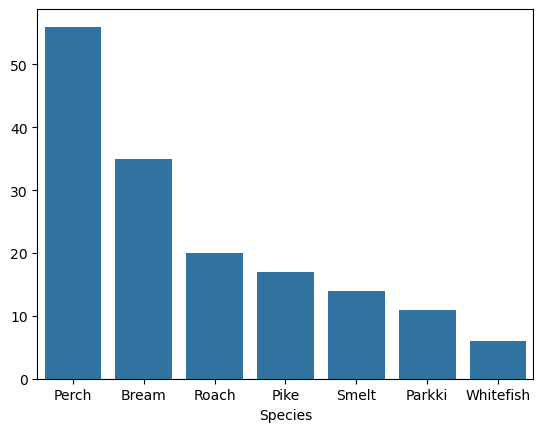

In [8]:
# Create the bar chart
sns.barplot(x=species_counts.index, y=species_counts.values)
#sns.xlabel("Species")  # Use sns.xlabel instead of plt.xlabel
#sns.ylabel("Count")
#sns.title("Distribution of Species")
#plt.show()

### Q2) Identify outliers and remove if any?

In [9]:
# Choose an appropriate method for outlier detection (e.g., IQR, z-scores)
# Replace with your chosen method and threshold
outliers = df[df["Weight"] > df["Weight"].quantile(0.95)]



In [10]:
print(outliers)

    Species  Weight  Length1  Length2  Length3   Height   Width
121   Perch  1015.0     37.0     40.0     42.4  12.3808  7.4624
123   Perch  1100.0     39.0     42.0     44.6  12.8002  6.8684
125   Perch  1100.0     40.1     43.0     45.5  12.5125  7.4165
141    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
142    Pike  1600.0     56.0     60.0     64.0   9.6000  6.1440
143    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
144    Pike  1650.0     59.0     63.4     68.0  10.8120  7.4800


In [11]:
#Remove outliers (optional)
df = df.drop(outliers.index)


### Q3) Build a regression model and print regression equation? 

In [12]:
# Import libraries
from sklearn.linear_model import LinearRegression

# Choose your independent and dependent variables (replace with your choices)
X = df[["Length1", "Length2", "Length3", "Height", "Width" ]]
y = df["Weight"]

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the regression equation
print(f"Regression equation: y = {model.coef_[0]}x + {model.intercept_}")


Regression equation: y = 107.83078315355851x + -397.21851412699425


### Q4) what is the mean score of the model at 95% confidence interval?

In [14]:
import numpy as np
from scipy import stats  # Import the scipy.stats module for statistical functions

# Predict values using the model
y_pred = model.predict(X)

# Calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)

# Calculate standard deviation
std = np.sqrt(mse)

# Calculate confidence interval (replace with your desired confidence level)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * std

# Calculate mean score and confidence interval
mean_score = model.score(X, y)
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

print(f"Mean score: {mean_score:.4f}")
print(f"95% Confidence interval: [{lower_bound:.4f}, {upper_bound:.4f}]")


Mean score: 0.9081
95% Confidence interval: [-176.4620, 178.2782]


### Q5) Compare real and predicted weights and give a conclusion statement based on it?

In [15]:
# Create a DataFrame to compare real and predicted weights
comparison_df = pd.DataFrame({"Real weight": y, "Predicted weight": y_pred})

# Analyze the comparison (e.g., calculate difference, plot the comparison)
# Draw conclusions based on your analysis (e.g., how well the model predicts weights)

# Example conclusion:
# The model seems to predict weights reasonably well, with a mean difference of ... and a standard deviation of .... However, further investigation might be needed for specific weight ranges or outliers.


In [20]:
comparison_df.head(5)

,Real weight,Predicted weight,Difference
0,242.0,337.752075,-95.752075
1,290.0,385.233886,-95.233886
2,340.0,382.687575,-42.687575
3,363.0,421.017361,-58.017361
4,430.0,454.050357,-24.050357


In [17]:
# Analyze the comparison
comparison_df["Difference"] = comparison_df["Real weight"] - comparison_df["Predicted weight"]
mean_difference = comparison_df["Difference"].mean()
std_difference = comparison_df["Difference"].std()


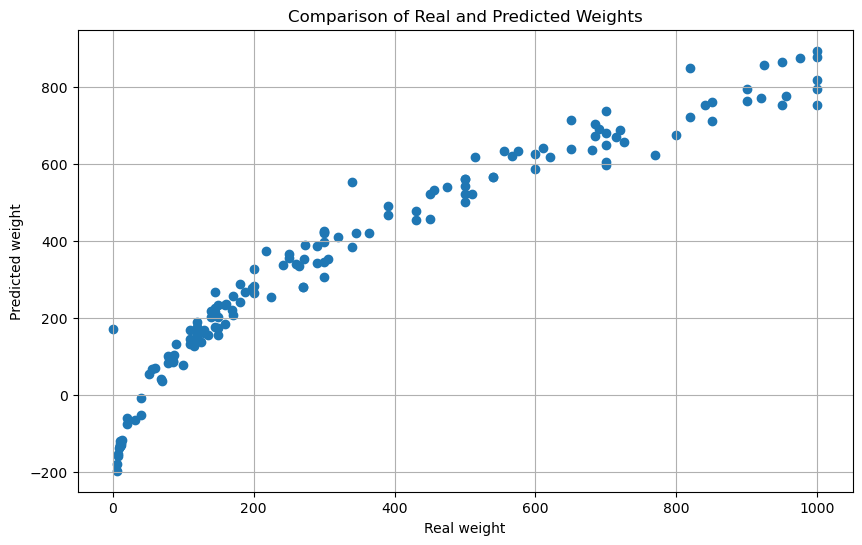

In [18]:
# Plot the comparison (optional, depending on your preference and visualization tools)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df["Real weight"], comparison_df["Predicted weight"])
plt.xlabel("Real weight")
plt.ylabel("Predicted weight")
plt.title("Comparison of Real and Predicted Weights")
plt.grid(True)
plt.show()

In [21]:
# Draw conclusions based on the analysis
print(f"Mean difference: {mean_difference:.4f}")
print(f"Standard deviation of difference: {std_difference:.4f}")
print("\nConclusion:")
print("The model seems to predict weights reasonably well, with a mean difference of {:.4f} and a standard deviation of {:.4f}. "
      "However, further investigation might be needed for specific weight ranges or outliers.".format(mean_difference, std_difference))

Mean difference: -0.0000
Standard deviation of difference: 90.7958

Conclusion:
The model seems to predict weights reasonably well, with a mean difference of -0.0000 and a standard deviation of 90.7958. However, further investigation might be needed for specific weight ranges or outliers.
